# Example 3.1

From Parameter Estimation and Inverse Problems, 3rd edition, 2018    
by R. Aster, B. Borchers, C. Thurber

## Implemented in Python by:
* Nima Nooshiri [@nimanzik](https://github.com/nimanzik)

---

In [1]:
%reset -f

## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as nla

from peiplib.plot import get_cbar_axes

In [3]:
plt.style.use('ggplot')
plt.style.use('./data/peiplib.mplstyle')

## System matrix $\textrm{G}$ for the ray path models

In [4]:
# Dimension of matrix G
n = 9   # no. of parameters of slowness model
m = 8   # no. of travel-time observations

# Construct the system matrix
G = np.zeros((m, n), dtype=np.float64)

for i in range(3):
    G[i, [i, i+3, i+6]] = 1.0

for i in range(3, 6):
    j1 = (i - 3) * 3
    j2 = j1 + 3
    G[i, j1:j2] = 1.0

G[6, [0, 4, 8]] = np.sqrt(2)
G[7, -1] = np.sqrt(2)

### Singular values for the system matrix $\textbf{G}$

In [5]:
U, S, VT = nla.svd(G, compute_uv=True, full_matrices=True)
V = np.transpose(VT)

print('Singular values', 'diag(S) =', S[:, np.newaxis], '', sep='\n')

Singular values
diag(S) =
[[3.17982071e+00]
 [2.00000000e+00]
 [1.73205081e+00]
 [1.73205081e+00]
 [1.73205081e+00]
 [1.60697051e+00]
 [5.53521445e-01]
 [1.11481381e-16]]



## Model null space, $N(\textbf{G})$

In [6]:
# Find and display system rank
p = nla.matrix_rank(G)
print('System rank:', f'p={p}', '\n')

# Display model null space vectors
V0 = V[:, p:n]
print('Model null space vectors', 'V0 =', V0, '', sep='\n')

# Display null space vectors reshaped to match tomography example geometry
m01 = np.reshape(V[:, p], (3, 3))
m02 = np.reshape(V[:, p+1], (3, 3))

print(
    'Model null-space vectors reshaped into matrices',
    'm01 =', m01, '', 'm02 =', m02, '', sep='\n')

System rank: p=7 

Model null space vectors
V0 =
[[-3.84196754e-01  1.38056225e-01]
 [-1.38056225e-01 -3.84196754e-01]
 [ 5.22252978e-01  2.46140529e-01]
 [ 1.38056225e-01  3.84196754e-01]
 [ 3.84196754e-01 -1.38056225e-01]
 [-5.22252978e-01 -2.46140529e-01]
 [ 2.46140529e-01 -5.22252978e-01]
 [-2.46140529e-01  5.22252978e-01]
 [ 4.02455846e-16  5.55111512e-17]]

Model null-space vectors reshaped into matrices
m01 =
[[-3.84196754e-01 -1.38056225e-01  5.22252978e-01]
 [ 1.38056225e-01  3.84196754e-01 -5.22252978e-01]
 [ 2.46140529e-01 -2.46140529e-01  4.02455846e-16]]

m02 =
[[ 1.38056225e-01 -3.84196754e-01  2.46140529e-01]
 [ 3.84196754e-01 -1.38056225e-01 -2.46140529e-01]
 [-5.22252978e-01  5.22252978e-01  5.55111512e-17]]



### Display images of model null-space vectors

In [7]:
def helper_disp_image(
        data, fig, cmap='bone', vmin=None, vmax=None, cbar_ticks=None,
        xticks=None, yticks=None):
    """
    A helper function to display data as images in the Example 3.1
    """
    ax = fig.add_subplot(111)
    cimg = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax)
    cax = get_cbar_axes(ax)
    cbar = plt.colorbar(cimg, cax=cax, ticks=cbar_ticks)
    if xticks is None:
        xticks = ax.get_xticks()
    
    if yticks is None:
        yticks = ax.get_yticks()
        
    ax.set(xlabel='j', ylabel='i', xticks=xticks, yticks=yticks)
    ax.grid(False)

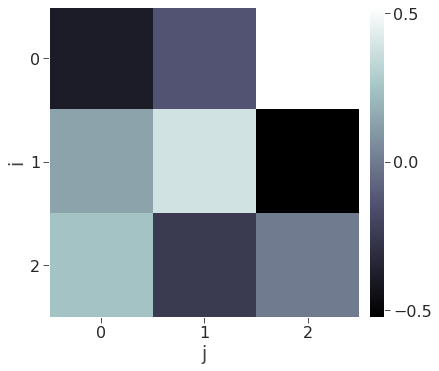

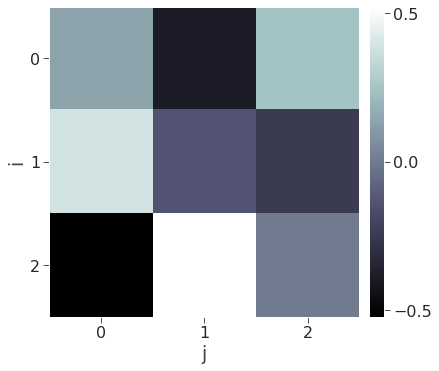

In [8]:
# Display image of null space model V.,8
fig1 = plt.figure()
helper_disp_image(
    m01, fig1, cbar_ticks=[-0.5, 0.0, 0.5], xticks=range(3), yticks=range(3))

# Display image of null space model V.,9
fig2 = plt.figure()
helper_disp_image(
    m02, fig2, cbar_ticks=[-0.5, 0.0, 0.5], xticks=range(3), yticks=range(3))

## Data null space, $N(\textbf{G}^T)$

In [9]:
# Display data null space vectors
U0 = U[:, p:]
print('Data null space vector', 'U0 =', U0, '', sep='\n')

Data null space vector
U0 =
[[-4.0824829e-01]
 [-4.0824829e-01]
 [-4.0824829e-01]
 [ 4.0824829e-01]
 [ 4.0824829e-01]
 [ 4.0824829e-01]
 [ 0.0000000e+00]
 [ 4.4408921e-16]]



## Model resolution matrix
### Display full model resolution matrix, $\textbf{R}_m$

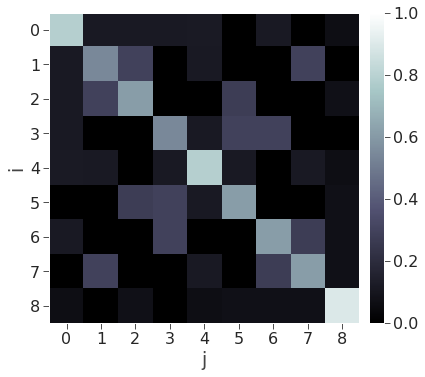

In [10]:
# Find model resolution matrix, Rm
Vp = V[:, 0:p-1]
Rm = Vp @ Vp.T

# Display full Rm
fig = plt.figure()
helper_disp_image(
    Rm, fig, vmin=0.0, vmax=1.0, cbar_ticks=np.arange(0.0, 1.2, 0.2),
    xticks=range(9), yticks=range(9))

### Display diagonal elements of the model resolution matrix, $\textrm{diag}(\textbf{R}_m)$

Diagonal elements of model resolution matrix
Rm_diag=
[[0.78594333 0.54453228 0.61031577]
 [0.54453228 0.78594333 0.61031577]
 [0.61031577 0.61031577 0.89778571]]



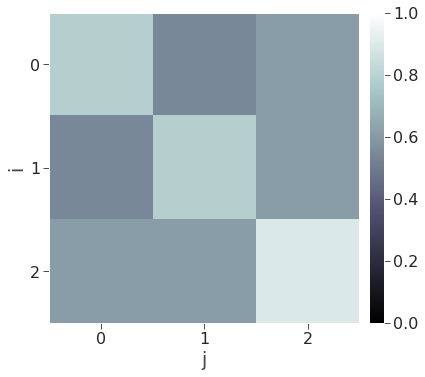

In [11]:
# Reshaped diagonal elements of the model resolution matrix
Rm_diag = np.diagonal(Rm).reshape(3, 3)

print(
    'Diagonal elements of model resolution matrix',
    'Rm_diag=', Rm_diag, '', sep='\n')

# Display Rm_diag
fig = plt.figure()
helper_disp_image(
    Rm_diag, fig, vmin=0.0, vmax=1.0, cbar_ticks=np.arange(0.0, 1.2, 0.2),
    xticks=range(3), yticks=range(3))

## Spike resolution test

In [12]:
# Construct spike model
mtest = np.zeros((n, 1))
mtest[4, 0] = 1.0

# Get noise free data for the spike model (forward problem)
dtest = G @ mtest

# Spike model and noise-free data
print(
    'Model spike and predicted data',
    'mtest =', mtest, '', 'dtest =', dtest, '', sep='\n')

# Recovered model from spike test
Gdagger = nla.pinv(G)
mdagger = Gdagger @ dtest

print(
    'Recovered model from the spike test',
    'mdagger =', mdagger, '', sep='\n')

Model spike and predicted data
mtest =
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]

dtest =
[[0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [1.41421356]
 [0.        ]]

Recovered model from the spike test
mdagger =
[[ 1.66666667e-01]
 [-1.11022302e-16]
 [-1.66666667e-01]
 [ 1.66533454e-16]
 [ 8.33333333e-01]
 [ 1.66666667e-01]
 [-1.66666667e-01]
 [ 1.66666667e-01]
 [ 1.19729462e-16]]



### Display reshaped noise free spike model

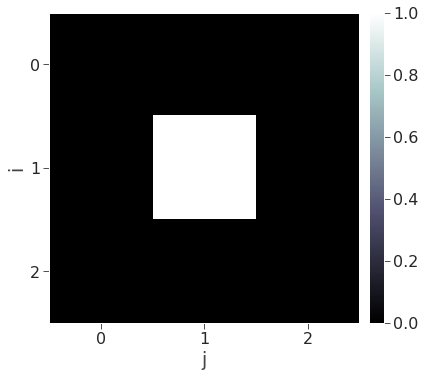

In [13]:
fig = plt.figure()
helper_disp_image(
    mtest.reshape(3, 3), fig, vmin=0.0, vmax=1.0,
    cbar_ticks=np.arange(0.0, 1.2, 0.2), xticks=range(3), yticks=range(3))

### Display reshaped recovered spike model

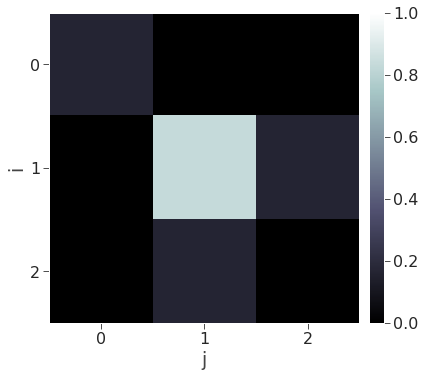

In [14]:
fig = plt.figure()
helper_disp_image(
    mdagger.reshape(3, 3), fig, vmin=0.0, vmax=1.0,
    cbar_ticks=np.arange(0.0, 1.2, 0.2), xticks=range(3), yticks=range(3))